In [33]:
"""
analytical collisional spectroscopy
from
Classical line shapes based on analytical solutions of bimolecular trajectories in collision induced emission 
David Reguera; George Birnbaum
https://doi.org/10.1063/1.2371097
"""
import sympy as sm
import numpy as np
import matplotlib.pyplot as plt

import utilities.reduced_parameter as red

Epsilon (erg) 1.6538969109051514e-14
Reduced epsilon (Ar-Ar, Ar-Xe, Xe-Xe): 1.0 ; 1.3825301204819278 ; 1.9116465863453815
CGS epsilon (Ar-Ar, Ar-Xe, Xe-Xe): 1.6538969109051514e-14 ; 2.286562295498387e-14 ; 3.161666383899004e-14
######################
Length multiple - Sigma (cm) 3.41e-08
Reduced sigma (Ar-Ar, Ar-Xe, Xe-Xe): 1.0 ; 1.095307917888563 ; 1.190615835777126
######################
Mass multiples (g) 6.633521465546083e-23
Reduced Mass (Ar, Xe): 1.0 ; 3.286597576849905
######################
Dipole unit multiple (statC . cm) 8.09814943451058e-19
Reduced dipole parameter:
mu0 =  0.08920009870622121
a =  7.8952761266316935
d0 =  1.1018059229945159
d7 =  0.030776244402154505
CGS dipole parameter:
mu0 =  7.223557288960733e-20
a = 2.32E+08
d0 =  3.757158197411299e-08
######################
Time 2.159594587679023e-12
Velocity multiple (cm/s) 15790.00067630667
Temperature  119.79126562255514
######################
c:  1899936.5874009002
Epsilon parameters matrix 
[[1.         1.3825301

In [7]:
p =sm.symbols('rho')
w0 = sm.symbols('omega_0')
w = sm.symbols('omega')
k = sm.symbols('kappa')

g = sm.sqrt(w0 * (p - 1))

In [35]:
F = w**4 * sm.sinh((w/g) * sm.acos(-1 / sm.sqrt(p))) / sm.sinh(w * sm.pi/g)
#F = w**4 * sm.sinh((w/g) * (sm.pi - sm.sqrt(p - 1)**0.5 + (1/3) * (p-1)**(3/2)) ) / sm.sinh(w * sm.pi/g)
#F = w**4 * sm.sech(w * sm.pi / (2 * g))
F

omega**4*sinh(omega*acos(-1/sqrt(rho))/sqrt(omega_0*(rho - 1)))/sinh(pi*omega/sqrt(omega_0*(rho - 1)))

In [36]:
dF = sm.diff(F, w)
dF

omega**4*cosh(omega*acos(-1/sqrt(rho))/sqrt(omega_0*(rho - 1)))*acos(-1/sqrt(rho))/(sqrt(omega_0*(rho - 1))*sinh(pi*omega/sqrt(omega_0*(rho - 1)))) - pi*omega**4*sinh(omega*acos(-1/sqrt(rho))/sqrt(omega_0*(rho - 1)))*cosh(pi*omega/sqrt(omega_0*(rho - 1)))/(sqrt(omega_0*(rho - 1))*sinh(pi*omega/sqrt(omega_0*(rho - 1)))**2) + 4*omega**3*sinh(omega*acos(-1/sqrt(rho))/sqrt(omega_0*(rho - 1)))/sinh(pi*omega/sqrt(omega_0*(rho - 1)))

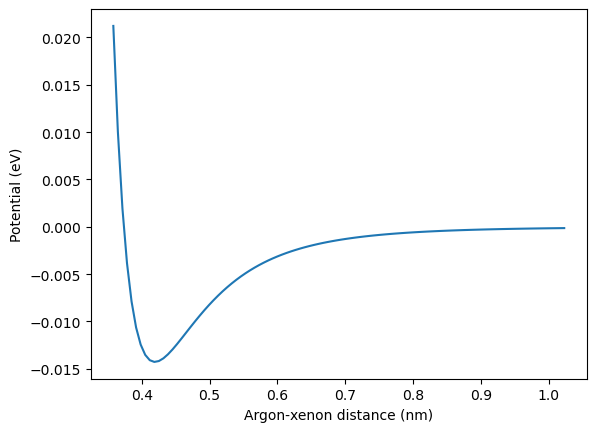

In [34]:
potential_function = lambda r:  4 * red.epsilon_Ar_Xe \
            * ( (red.sigma_Ar_Xe/r)**12 - (red.sigma_Ar_Xe/r)**6 )

fig,ax = plt.subplots()

R = np.linspace(1.05,3,100)
ax.plot(
    R * red.sigma * 1e7, 
    red.convert_energy(potential_function(R),'ev')
)
ax.set_xlabel('Argon-xenon distance (nm)')
ax.set_ylabel('Potential (eV)')
fig.savefig('potential.jpeg',dpi = 600)